In [66]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
import scipy.stats as st
%matplotlib inline

import analyzer
import subject
import visualization
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)

<module 'visualization' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/visualization.py'>

Set file paths

In [67]:
rootPath = '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/data'

In [68]:
surveyDataFilePath = os.path.join(rootPath, 'survey.csv')
jsonFilesRootPath = os.path.join(rootPath, 'log')

Initialize the analyzer

In [69]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, jsonFilesRootPath)

In [70]:
resultAnalyzer.gradeAnswers(confidenceThreshold=20)

In [71]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]

In [72]:
s0.printScoreSummary()

Subject: 5401038285006004819-9_15_19_13 - condition: 6
Fcl: 0.89, Fpwc: 0.56, Dcl: 0.78, Dpwc: 0.56


In [73]:
s1.printScoreSummary()

Subject: 3700789476005004819-9_16_15_58 - condition: 5
Fcl: 0.22, Fpwc: 0.33, Dcl: 0.67, Dpwc: 0.33


In [74]:
s2.printScoreSummary()

Subject: 3664515135004004819-9_20_14_13 - condition: 4
Fcl: 0.33, Fpwc: 0.67, Dcl: 0.44, Dpwc: 0.33


In [75]:
print(s0.feature_classification_graded_answers)
print(s0.feature_comparison_graded_answers)
print(s0.design_classification_graded_answers)
print(s0.design_comparison_graded_answers)

[1, 1, 1, 1, 1, 1, 1, 0, 1]
[1, 0, 1, 0, 1, 1, 0, 0, 1]
[1, 1, 0, 1, 1, 1, 1, 1, 0]
[1, 1, 0, 1, 1, 0, 0, 0, 1]


In [76]:
print(s1.feature_classification_graded_answers)
print(s1.feature_comparison_graded_answers)
print(s1.design_classification_graded_answers)
print(s1.design_comparison_graded_answers)

[0, 1, 0, 1, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 0, 1, 0]
[1, 0, 0, 1, 0, 1, 0, 0, 0]


In [77]:
print(s2.feature_classification_graded_answers)
print(s2.feature_comparison_graded_answers)
print(s2.design_classification_graded_answers)
print(s2.design_comparison_graded_answers)

[0, 1, 0, 0, 0, 1, 0, 0, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 0, 0, 0, 0, 0, 1, 0]


In [78]:
print(s0.countFeatureParity(positive=True))
print(s0.countFeatureParity(positive=False))

(0.44, [1, 1, 0, 1, 0, 0, 1, 0, 0])
(1.0, [1, 1, 1, 1, 1, 1, 1, 1, 1])


In [79]:
print(s1.countFeatureParity(positive=True))
print(s1.countFeatureParity(positive=False))

(0.22, [1, 0, 0, 0, 0, 0, 1, 0, 0])
(0.33, [0, 1, 0, 0, 0, 1, 1, 0, 0])


In [80]:
print(s2.countFeatureParity(positive=True))
print(s2.countFeatureParity(positive=False))

(0.67, [0, 1, 0, 1, 1, 0, 1, 1, 1])
(0.33, [0, 1, 0, 0, 0, 0, 0, 1, 1])


In [81]:
s0.demographic_data

{'age': 33, 'gender': 2, 'education': 7, 'major': '1,7', 'employerType': '2'}

In [82]:
s1.demographic_data

{'age': 34, 'gender': 1, 'education': 7, 'major': '1', 'employerType': '4'}

In [83]:
s2.demographic_data

{'age': 31, 'gender': 1, 'education': 7, 'major': '1,6', 'employerType': '2'}

In [84]:
die here

SyntaxError: invalid syntax (<ipython-input-84-c985d6ba8f59>, line 1)

In [85]:
g1 = [s0]
g2 = [s1]
g3 = [s2]

In [86]:
visualizer = visualization.Visualizer([g1,g2,g3], ['Interactive','Automated','Manual'])

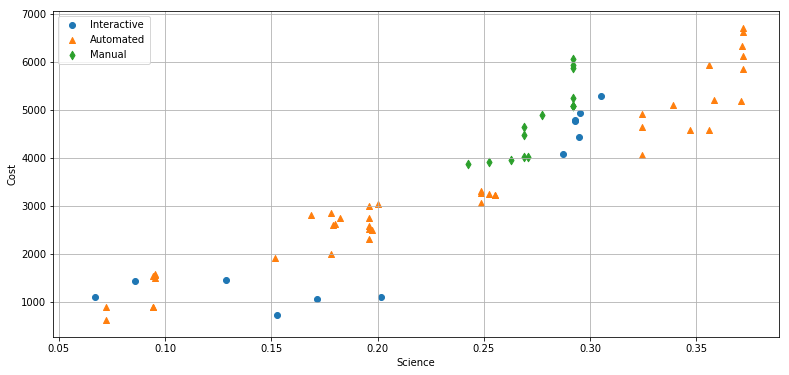

In [87]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


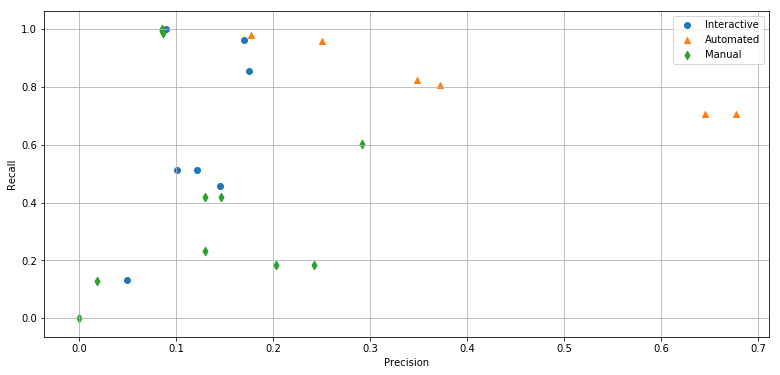

In [88]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


In [ ]:
die here

In [ ]:
# subjects = analyzer.filterSubjects(pretest_score_threshold=0.5)
subjects = None

means = []
stdevs = []

temp = []

for i in range(3):    
    data = analyzer.getScoreData(subjects=subjects, 
                                 condition_number=i, 
                                 exclude_first_task=True, 
                                 conf_min=0, 
                                 conf_max=100, 
                                 time_min=None)
    
    temp.append(data)

    mean = np.mean(data)
    stdev = np.std(data)
    standardError = stdev / math.sqrt(len(data))
    confInterval = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    print("condition: {0}, mean: {1}, std: {2}, standardError: {3}".format(i, mean, stdev, standardError))
    
    means.append(mean)
    stdevs.append(stdev)

In [ ]:
np.shape(temp)

In [ ]:
st.ttest_ind(temp[0], temp[1])

In [ ]:
plotBarGraph(means[0], stdevs[0], means[1], stdevs[1], means[2], stdevs[2])

# Confidence

In [ ]:
# subjects = analyzer.filterSubjects(pretest_score_threshold=0.5)
subjects = None

means = []
stdevs = []

for i in range(3):    
    data = analyzer.getConfidenceData(subjects=subjects, 
                                 condition_number=i, 
                                 exclude_first_task=False)

    mean = np.mean(data)
    stdev = np.std(data)
    standardError = stdev / math.sqrt(len(data))
    confInterval = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    print("condition: {0}, mean: {1}, std: {2}, standardError: {3}".format(i, mean, stdev, standardError))
    
    means.append(mean)
    stdevs.append(stdev)

In [ ]:
plotBarGraph(means[0], stdevs[0], means[1], stdevs[1], means[2], stdevs[2])

# Individual Participant Scores

In [ ]:
for i in range(len(analyzer.data)):
    dat = analyzer.data[i]
    print("_______________")
    print("key: {0}".format(dat.key) )
    print("Pretest: {0}".format(dat.getScore(problem_type="pretest")))
    print("DSE: {0}".format(dat.getScore(condition_number=0)))
    print("F_bar: {0}".format(dat.getScore(condition_number=1)))
    print("F_scatter: {0}".format(dat.getScore(condition_number=2)))

In [ ]:
scores = [[],[],[]]
confidences = [[],[],[]]
conditions = [[],[],[]]
times = [[],[],[]]
pretestScores = [[],[],[]]
diff = [[],[],[]]

for i in range(len(analyzer.data)):
    subject = analyzer.data[i]
    
    for j in range(3):
        score = subject.getScore(condition_number=j)
        confidence = subject.getConfidence(condition_number=j)
        time = subject.getTime(condition_number=j)
        pretestScore = subject.getScore(problem_type="pretest")
        scoreDiff = score - pretestScore
        
        scores[j].append(score)
        confidences[j].append(np.mean(confidence))
        times[j].append(np.mean(time))
        pretestScores[j].append(pretestScore)
        diff[j].append(scoreDiff)
    
fig, ax = plt.subplots(figsize=(13,6))
colors = ['red','green','blue']
sizes = [80,80,300]
markers = ['o','^','2']

for i, condition in enumerate(['DSE', 'FSE_bar', 'FSE_scatter']):
    #ax.scatter(scores[i], confidences[i], s=sizes[i], c=colors[i], marker=markers[i], label=condition, alpha=0.6, edgecolors='none')

    sc = ax.scatter(scores[i], 
               times[i], 
               s=sizes[i], 
               c=None, 
               marker=markers[i], 
               cmap="coolwarm", 
               label=condition, 
               alpha=1.0, 
               edgecolors='none')

ax.legend()
ax.grid(True)
ax.set_xlabel('Mean score')
ax.set_ylabel('Mean time')
# plt.colorbar(sc)
plt.show()


In [ ]:
np.shape(diff)

In [ ]:
st.ttest_ind(diff[0], diff[2])

In [ ]:
st.ttest_ind(diff[0], diff[1])

In [ ]:
np.mean(diff[0])

In [ ]:
np.mean(diff[2])

In [ ]:
def plotScatter(x1, x2, x3):
    plt.scatter(x1,x2, s=None, c=x3, alpha=0.5)
    plt.show()

In [ ]:
def plotBarGraph(mean1, stdev1, mean2, stdev2, mean3=None, stdev3=None):
    
    if mean3 is not None:
        N = 3
        means = (mean1, mean2, mean3)
        stdevs = (stdev1, stdev2, stdev3)
    
    else:
        N = 2
        means = (mean1, mean2)
        stdevs = (stdev1, stdev2)
        
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, means, width, color='skyblue', yerr=stdevs)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Scores')
    ax.set_title('Scores')
    
    if mean3 is not None:
        ax.set_xticks(ind + width / 3)
        ax.set_xticklabels(('1', '2', '3'))
        
    else:
        ax.set_xticks(ind + width / 2)
        ax.set_xticklabels(('1', '2'))

    #ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

    plt.show()

In [ ]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [ ]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    

## All subjects

In [ ]:
subjects = analyzer.results
len(subjects)

In [ ]:
m1,m2,s1,s2 = analyzer.printStatistics(subjects)
plotBarGraph(m1,s1,m2,s2)

In [ ]:
f1,f2 = analyzer.getScoreData(subjects)
data = [[str(x),str(y)] for x,y in zip(f1,f2)]
writeToFile(data, header="First condition, Second condition")
plotECDF(f1,f2)

In [ ]:
plt.hist(analyzer.first_condition_scores,bins=7)

In [ ]:
plt.hist(analyzer.second_condition_scores,bins=7)